In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [9]:
housing = pd.read_csv('USA_Housing.csv')

In [10]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

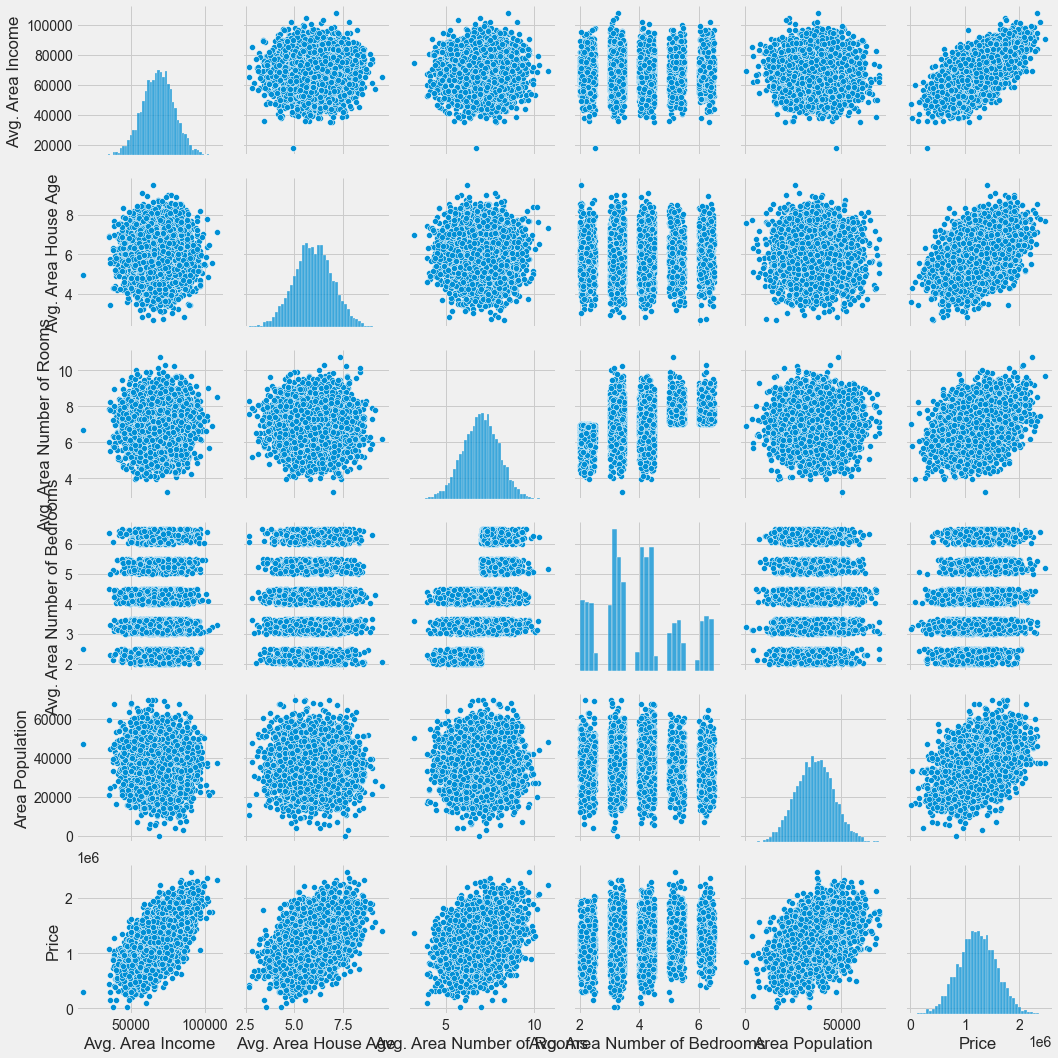

In [15]:
sns.pairplot(housing)

/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

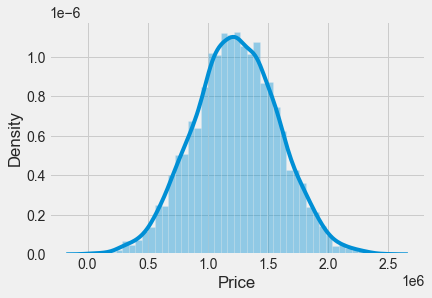

In [16]:
sns.distplot(housing['Price'])

<AxesSubplot:>

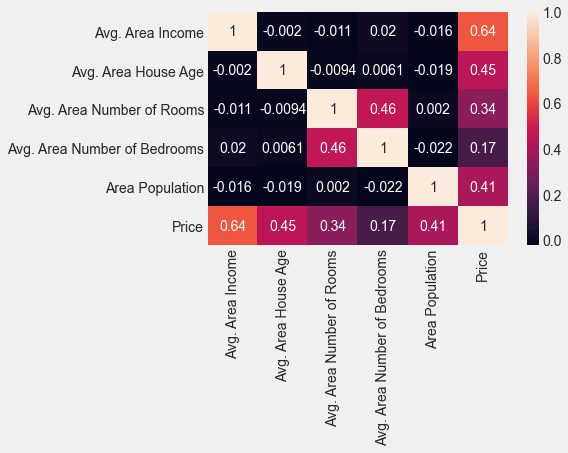

In [18]:
sns.heatmap(housing.corr(), annot=True)

In [19]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [20]:
X = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing['Price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [43]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv = 10)

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE :', mae)
    print('MSE :', mse)
    print('rmse :', rmse)
    print('r2_square :', r2_square)
    
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
    
    

In [26]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4227,66547.016454,5.846095,6.847298,4.13,27850.822901
4676,53722.008599,6.401391,7.787764,3.30,47649.224665
800,64838.492899,6.437157,8.699544,4.02,32921.010068
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
4193,75245.465436,8.167820,7.420100,3.42,37410.669928
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [31]:
X_train

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
print(lin_reg.intercept_)

1229576.9925600903


In [36]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])

In [37]:
coeff_df

,Coefficient
Avg. Area Income,231741.876652
Avg. Area House Age,163580.776566
Avg. Area Number of Rooms,120724.771387
Avg. Area Number of Bedrooms,2992.449135
Area Population,152235.900097


In [38]:
pred = lin_reg.predict(X_test)

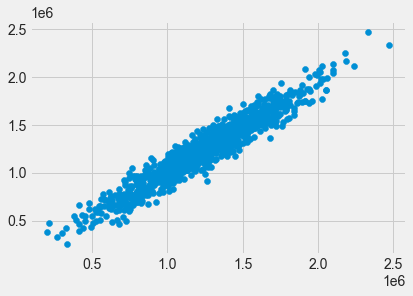

In [39]:
plt.scatter(y_test, pred)

/Users/sandeepsangole/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

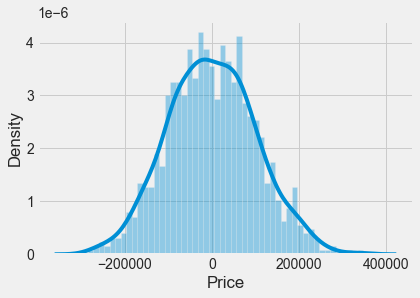

In [41]:
sns.distplot((y_test - pred), bins = 50)

In [44]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE : 80879.09723489442
MSE : 10089009300.893988
rmse : 100444.0605555848
r2_square : 0.9179971706834331
Train set evaluation:
_____________________________________
MAE : 81509.3933124445
MSE : 10256318867.482723
rmse : 101273.48551068401
r2_square : 0.9179787435623722


In [45]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,80879.097235,1.008901e+10,100444.060556,0.917997,None
